# Importar bibliotecas necessárias 

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Cores e estilos

#sns.set_style('darkgrid')
sns.set_palette("RdBu", n_colors=7)

# Usando o repositório do Google Drive

In [2]:
#Dando permissão de acesso
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Determinado o diretório de trabaçho
!ls drive/My\ Drive/'Colab Notebooks'/VC-Dados

FLOR.jpg  Teste  Treinamento


In [4]:
# Criar caminho
RAIZ="drive/My Drive/Colab Notebooks/VC-Dados/"
print(RAIZ)

drive/My Drive/Colab Notebooks/VC-Dados/


# 1. "Olá mundo" da visão computacional

In [0]:
#Montar imagem na forma vetorial
PATH_EXEMPLO=RAIZ+'Treinamento/positivos/crop_000010.png'
imagem_teste=cv2.imread(PATH_EXEMPLO)

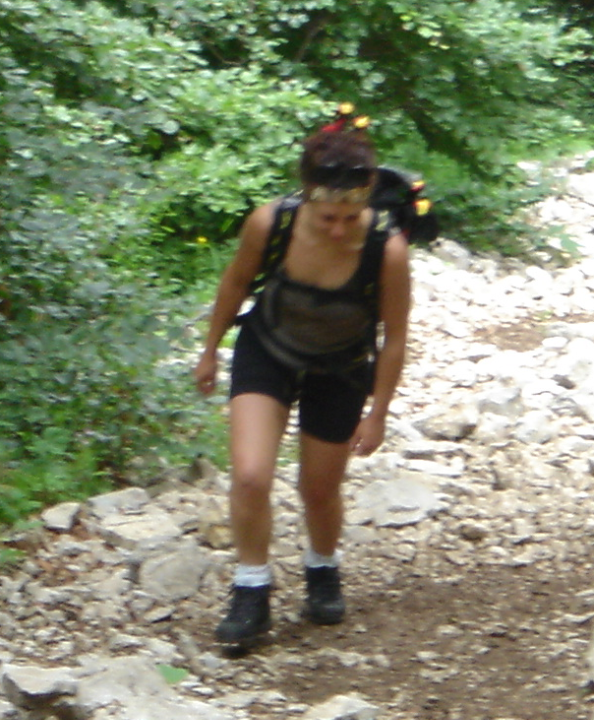

In [6]:
#Montar imagem na forma visual
cv2_imshow(imagem_teste)

# 2. Transformações em Imagens

In [7]:
# O que a imagem significa para máquina ?
print(type(imagem_teste))

<class 'numpy.ndarray'>


In [8]:
#Tamanho do vetor
imagem_teste.shape

(720, 594, 3)

* tamanho do eixo x= 720
* tamanho do eixo y= 593
* cores= 3 (RGB)

In [9]:
print('Minimo :', np.min(imagem_teste))
print('Máximo :', np.max(imagem_teste))

Minimo : 1
Máximo : 255


## 2.1 Canal de Cores

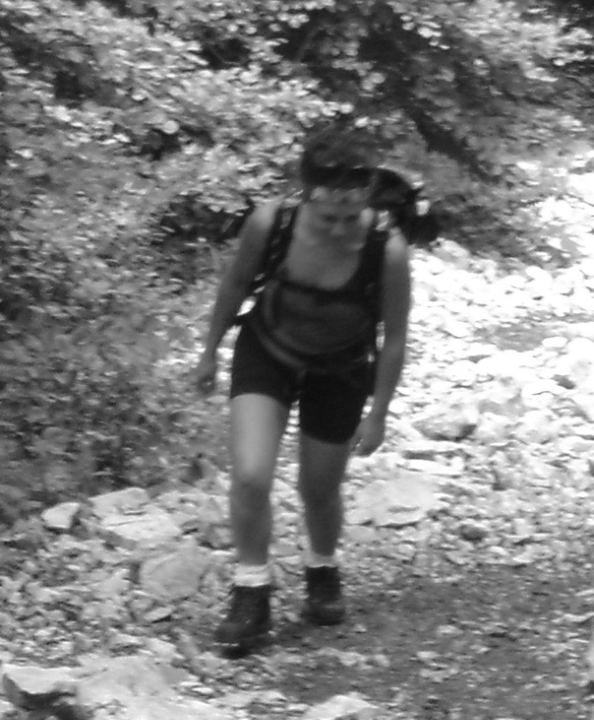

In [10]:
#Usar escala da cinza como forma de reduzir a dimensionaliade 
imagem_teste_cinza=cv2.cvtColor(imagem_teste,cv2.COLOR_RGB2GRAY)
cv2_imshow(imagem_teste_cinza)

In [11]:
#Tamanho do novo vetor
imagem_teste_cinza.shape

(720, 594)

In [12]:
print('Minimo :', np.min(imagem_teste_cinza))
print('Máximo :', np.max(imagem_teste_cinza))

Minimo : 12
Máximo : 255


## 2.2. Redimensionamento

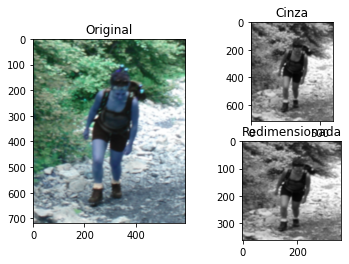

In [13]:
#Reduzir o tamanho da imagem
imagem_redimensionada=cv2.resize(imagem_teste_cinza,(360,360),interpolation=cv2.INTER_CUBIC)

#Plot
plt.subplot(121)
plt.title('Original')
plt.imshow(imagem_teste,cmap='gray',interpolation='bicubic')

plt.subplot(222)
plt.title('Cinza')
plt.imshow(imagem_teste_cinza,cmap='gray',interpolation='bicubic')

plt.subplot(224)
plt.title('Redimensionada')
plt.imshow(imagem_redimensionada,cmap='gray',interpolation='bicubic')

# 3. Ajuste de Brilho e Contraste

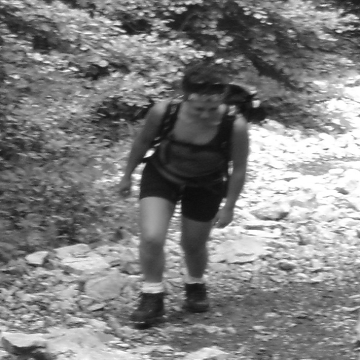

In [14]:
#bervar imagem redimensionada
cv2_imshow(imagem_redimensionada)

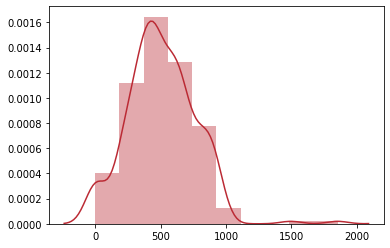

In [15]:
#Histograma de cores
histograma=cv2.calcHist([imagem_redimensionada],[0],None,[256],[0,256])
hist=sns.distplot(histograma.astype(np.int),bins=10)

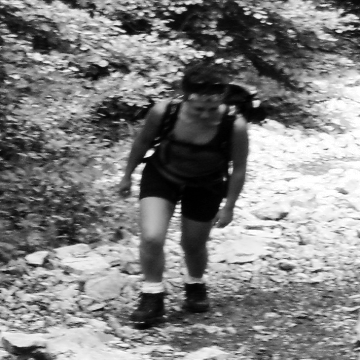

In [16]:
#Equalização de cores
imagem_equal=cv2.equalizeHist(imagem_redimensionada)
cv2_imshow(imagem_equal)

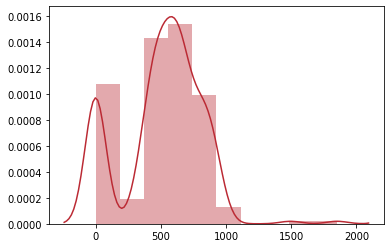

In [17]:
#Histograma de cores
histograma_2=cv2.calcHist([imagem_equal],[0],None,[256],[0,256])
hist=sns.distplot(histograma_2.astype(np.int),bins=10)

* depois de equalizada o contraste aumenta e o número de cores diminui drasticamente 

# *Exemplo*

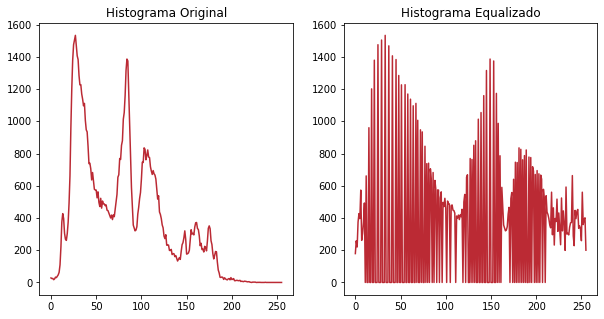

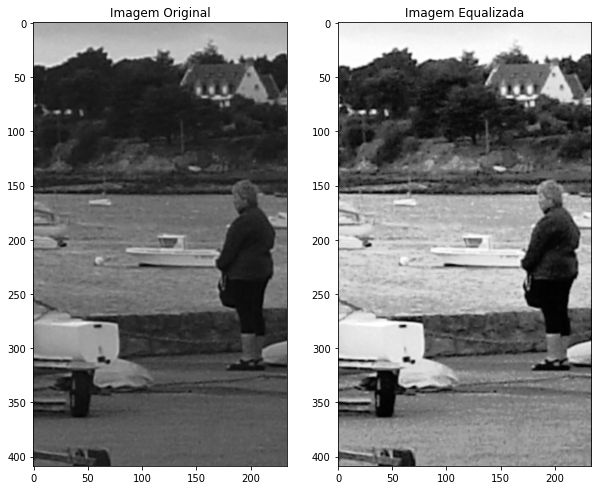

In [18]:
img_nome =RAIZ+'Treinamento/positivos/crop001632.png'

imagem = cv2.imread(img_nome, 0)
histograma = cv2.calcHist([imagem], [0], None, [256], [0,256])

img_equalizada_ex = cv2.equalizeHist(imagem)
histograma_equalizado = cv2.calcHist([img_equalizada_ex], [0], None,[256],[0,256])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(histograma)
plt.title("Histograma Original")
plt.subplot(122)
plt.plot(histograma_equalizado)
plt.title("Histograma Equalizado")

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imagem, cmap='gray', interpolation='bicubic')
plt.title("Imagem Original")
plt.subplot(122)
plt.imshow(img_equalizada_ex, cmap='gray', interpolation='bicubic')
plt.title("Imagem Equalizada")

plt.show()

# 4. Segmentação: Filtros de frequência e convoluçõe

In [0]:
#Binarizar imagem (preto e branco)
valor_retorno,imagem_binaria=cv2.threshold(imagem_equal,127,255,cv2.THRESH_BINARY) #0 (preto absoluto) -255 (branco absoluto)

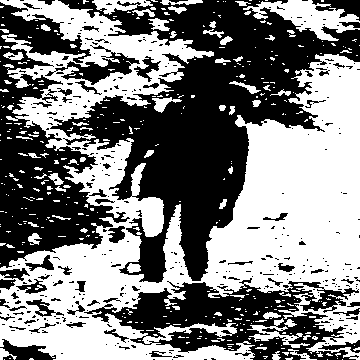

In [20]:
# Imagem 
cv2_imshow(imagem_binaria)

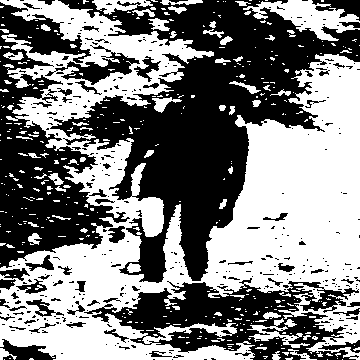

In [21]:
#Método adaptativos
valor_retorno_otsu,imagem_otsu=cv2.threshold(imagem_equal,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(imagem_otsu)

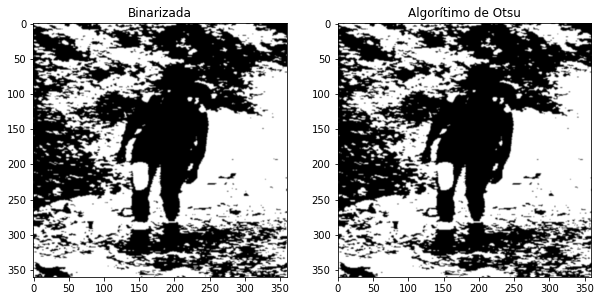

In [22]:
#Comparando

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title("Binarizada")
plt.imshow(imagem_binaria,cmap='gray',interpolation='bicubic')

plt.subplot(122)
plt.title("Algorítimo de Otsu")
plt.imshow(imagem_otsu,cmap='gray',interpolation='bicubic')



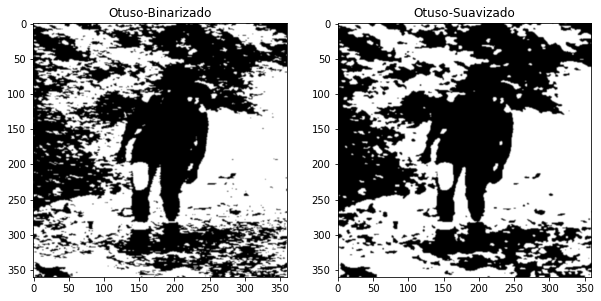

In [23]:
# Suavização
imagem_suavizada=cv2.GaussianBlur(imagem_equal,(9,9),1)

valor_retorno,imagem_binaria=cv2.threshold(imagem_equal,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
valor_retorno_otsu,imagem_otsu=cv2.threshold(imagem_suavizada,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title("Otuso-Binarizado")
plt.imshow(imagem_binaria,cmap='gray',interpolation='bicubic')

plt.subplot(122)
plt.title("Otuso-Suavizado")
plt.imshow(imagem_otsu,cmap='gray',interpolation='bicubic')


# *Exemplo*

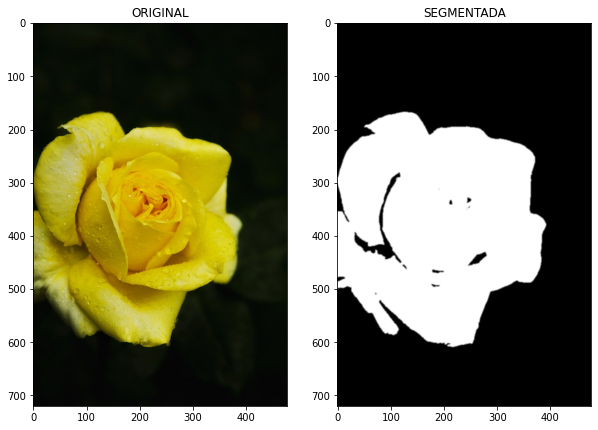

In [24]:
#Carregar imagem
PATH_FLOR=RAIZ+'FLOR.jpg'
FLOR_COLORIDA=cv2.imread(PATH_FLOR)
FLOR=cv2.imread(PATH_FLOR,0)

# # 1.Reduzir cores para escala de cinza (OPCIONAL)
# FLOR_CINZA=cv2.cvtColor(FLOR,cv2.COLOR_RGB2GRAY)

# # 2.Equlizar cores (OPCIONAL)
# FLOR_EQUALIZADA=cv2.equalizeHist(FLOR_CINZA)

# 3.Segmentação 

FLOR_SUAVIZADA=cv2.GaussianBlur(FLOR,(9,9),1) #Suavização
valor_retorno_otsu,FLOR_SEGM=cv2.threshold(FLOR_SUAVIZADA,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# 4. Plot
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title("ORIGINAL")
plt.imshow(cv2.cvtColor(FLOR_COLORIDA,cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.title("SEGMENTADA")
plt.imshow(FLOR_SEGM,cmap='gray',interpolation='bicubic')

# 5.Descrição de uma imagem

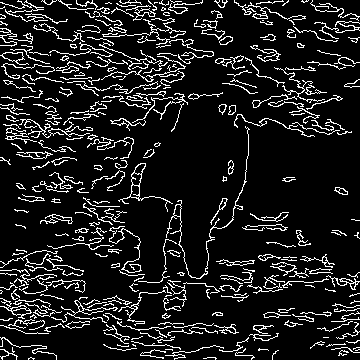

In [25]:
#Definir bordas
imagem_canny=cv2.Canny(imagem_suavizada,100,255)
cv2_imshow(imagem_canny)

In [0]:
#Pontos chaves
def get_pontos_chave (img_caminho):
  
    LARGURA = 360
    ALTURA = 360
    
    # 1.Ler a imgem
    img_teste = cv2.imread(img_caminho, 0)
    
    #2.Redimensionar
    img_redimensionada = cv2.resize(img_teste, (LARGURA, ALTURA), interpolation=cv2.INTER_CUBIC)
    
    # 3.Remover ruídos
    img_equalizada = cv2.equalizeHist(img_redimensionada)
    img_suavizada = cv2.GaussianBlur(img_equalizada, (9,9), 1)
    
    #4.Detectar pontos chaves
    orb = cv2.ORB_create(nfeatures=512)
    pontos_chave = orb.detect(img_suavizada, None)
    return pontos_chave, img_suavizada

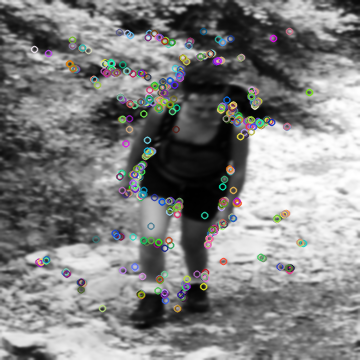

In [27]:
#Teste
pontos_chave,imagem_teste=get_pontos_chave(PATH_EXEMPLO)
imagem_com_pontos=cv2.drawKeypoints(imagem_teste,pontos_chave,outImage=np.array([]),flags=0)
cv2_imshow(imagem_com_pontos)

In [0]:
#Pontos descritores
def get_descritores (img_caminho):
  
    LARGURA = 360
    ALTURA = 360
    
    # 1.Ler a imgem
    img_teste = cv2.imread(img_caminho, 0)
    
    #2.Redimensionar
    img_redimensionada = cv2.resize(img_teste, (LARGURA, ALTURA), interpolation=cv2.INTER_CUBIC)
    
    # 3.Remover ruídos
    img_equalizada = cv2.equalizeHist(img_redimensionada)
    img_suavizada = cv2.GaussianBlur(img_equalizada, (9,9), 1)
    
    #4.Detectar pontos chaves
    orb = cv2.ORB_create(nfeatures=512)
    pontos_chave = orb.detect(img_suavizada, None)
    
    pontos_chave, descritores = orb.compute(img_suavizada, pontos_chave)
    
    return descritores

In [29]:
descritor=get_descritores(PATH_EXEMPLO)
print('Tipo :',type(descritor))
print('Formato :',descritor.shape)
print()

Tipo : <class 'numpy.ndarray'>
Formato : (512, 32)



# 6.Clusterização dos Dados

In [0]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import os

In [0]:
QUANTIDADE_PALAVRAS_VIRTUAIS = 512

class PacoteDePalavras:
    
    def gerar_dicionario(self, lista_descritores):
        kmeans = KMeans(n_clusters = QUANTIDADE_PALAVRAS_VIRTUAIS)
        kmenas = kmeans.fit(lista_descritores)
        self.dicionario = kmeans.cluster_centers_
        
    def histograma_de_frequencia(self, descritor):

        try:
            algoritmo_knn = NearestNeighbors(n_neighbors = 1)
            algoritmo_knn.fit(self.dicionario)
            mais_proximos = algoritmo_knn.kneighbors(descritor, return_distance = False).flatten()
            histograma_caracteristica = np.histogram(mais_proximos, bins=np.arange(self.dicionario.shape[0]+1))[0]
        
            return histograma_caracteristica
        except AttributeError:
            print("O atributo dicionario nao foi definido")

    def salvar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        try:
            np.savetxt(os.path.join(caminho, nome_dicionario), self.dicionario, delimiter=',', fmt='%f')
            print("Dicionario salvo")
            
        except AttributeError:
            print("Dicionario Vazio")
        
    def carregar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        
        self.dicionario = np.loadtxt(os.path.join(caminho,nome_dicionario), delimiter=',')


In [0]:
#Diretórios de treino
treinamento_positivo=RAIZ+'Treinamento/positivos/'
treinamento_negativo=RAIZ+'Treinamento/negativos/'
dados_treinamento = [treinamento_positivo, treinamento_negativo]

#Ler todos os arquivos em um diretório
descritores = np.empty((0,32), dtype=np.uint8)
DICIONARIO_NOME = 'dicionario.csv'

for caminho in dados_treinamento:

    for raiz,diretorios,arquivos in os.walk(caminho):
    
        for arquivo in arquivos:
            if arquivo.endswith('.png'):
               orb_descritor = get_descritores(os.path.join(caminho,arquivo))
               descritores = np.append(descritores, orb_descritor, axis=0)



In [33]:
img_representacao = PacoteDePalavras()
img_representacao.gerar_dicionario(descritores)
img_representacao.salvar_dicionario(RAIZ, DICIONARIO_NOME)

Dicionario salvo


 # 7.Classificação de Imagens

In [0]:
#salvar decritores
def salvar_descritor(descritor, caminho, nome_arquivo):
    descritor = descritor.reshape((1,descritor.size))
    arquivo = open(os.path.join(caminho, nome_arquivo), 'a')
    np.savetxt(arquivo, descritor, delimiter=',', fmt='%i')
    arquivo.close()

In [0]:
# computar descritores gerando histograma de cada imagem separadamente
NOME_DESCRITOR = 'orb_descritor.csv'

for caminho in dados_treinamento:
   for raiz, diretorios, arquivos in os.walk(caminho): 
      for arquivo in arquivos:
         if arquivo.endswith('.png'):
            descritor = get_descritores(os.path.join(caminho, arquivo))
            histograma_descritor = img_representacao.histograma_de_frequencia(descritor)
            salvar_descritor(histograma_descritor, caminho, NOME_DESCRITOR)

In [0]:
#Função carregar descritores
def carregar_descritores(caminho, nome_arquivo='orb_descritor.csv'):
    descritores = np.loadtxt(os.path.join(caminho, nome_arquivo), delimiter=',')
    print('formato do array de descritores: ', descritores.shape)
    return descritores

In [40]:
# Carregar descritores salvos

descritores = np.empty((0,QUANTIDADE_PALAVRAS_VIRTUAIS))
for caminho in dados_treinamento:
    descritores = np.append(descritores, carregar_descritores(caminho, NOME_DESCRITOR), axis=0)

formato do array de descritores:  (400, 512)
formato do array de descritores:  (400, 512)


In [42]:
# KNN para classificar as imagens
from sklearn.neighbors import KNeighborsClassifier

QUANTIDADE_DE_DADOS_TREINAMENTO = 400
QUANTIDADE_DE_DADOS_TESTE = 100

#Rotular dados de treinamento
rotulos_treinamento = np.ones(QUANTIDADE_DE_DADOS_TREINAMENTO, dtype=np.uint8)
rotulos_treinamento = np.append(rotulos_treinamento,np.zeros(QUANTIDADE_DE_DADOS_TREINAMENTO, dtype=np.uint8))

#Criar preditor
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(descritores,rotulos_treinamento)

#Aplicar em todas as imagens do diretório de teste
teste_positivo=RAIZ+'Teste/positivos/'
teste_negativo=RAIZ+'Teste/negativos/'
dados_teste = [teste_positivo, teste_negativo]

img_teste_descritores = np.empty((0,QUANTIDADE_PALAVRAS_VIRTUAIS), dtype=np.uint8)

for caminho in dados_teste:
    for raiz,diretorios, arquivos in os.walk(caminho):
        for arquivo in arquivos:
            if arquivo.endswith('.png'):
                img_descritor = get_descritores(os.path.join(caminho,arquivo))
                img_descritor = img_representacao.histograma_de_frequencia(img_descritor)
                img_dim_expandida = np.expand_dims(img_descritor, axis=0)
                img_teste_descritores = np.append(img_teste_descritores, img_dim_expandida, axis=0)

rotulos_teste = np.concatenate((np.ones(QUANTIDADE_DE_DADOS_TESTE, dtype=np.uint8), np.zeros(QUANTIDADE_DE_DADOS_TESTE, dtype=np.uint8)))
print('Acurácia: ',knn.score(img_teste_descritores, rotulos_teste))


Acurácia:  0.62


# 8.Interpretando os resultados

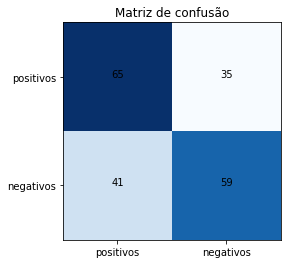

In [43]:
# Matriz de confusão 

from sklearn.metrics import confusion_matrix

rotulos_previstos = knn.predict(img_teste_descritores)
matriz = confusion_matrix(rotulos_teste, rotulos_previstos)

plt.imshow(matriz, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Matriz de confusão")

labels = ['positivos', 'negativos']

marcador_escalas = range(len(labels))

plt.yticks(marcador_escalas, labels)
plt.xticks(marcador_escalas, labels)

for linha in range(matriz.shape[0]):
    for coluna in range(matriz.shape[1]):
        plt.text(coluna, linha, format(matriz[linha,coluna]), horizontalalignment='center', color='black')
plt.show()

DADOS TREINAMENTO


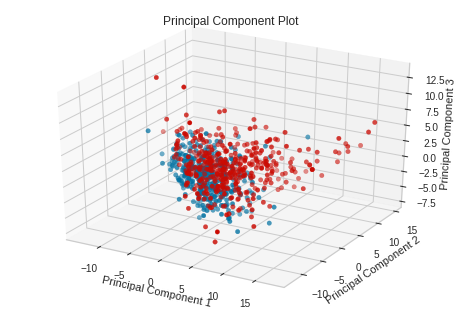

In [49]:
from yellowbrick.features.pca import PCADecomposition

print("DADOS TREINAMENTO")
cores_treinamento = np.array(['r' if label==0 else 'b' for label in rotulos_treinamento])
visualizador_treinamento = PCADecomposition(scale=True, color= cores_treinamento, proj_dim=3)
visualizador_treinamento.fit_transform(descritores, rotulos_treinamento)
visualizador_treinamento.poof()


DADOS TESTE


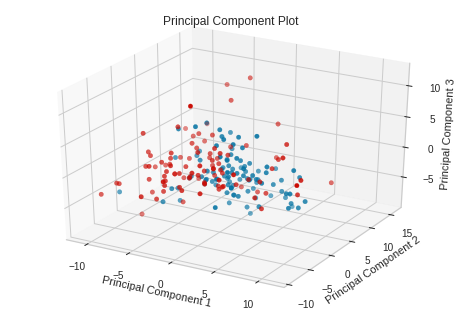

In [50]:
print("DADOS TESTE")

cores_teste = np.array(['r' if label == 0 else 'b' for label in rotulos_teste])
visualizador_teste = PCADecomposition(scale=True, color=cores_teste, proj_dim=3)
visualizador_teste.fit_transform(img_teste_descritores, rotulos_teste)
visualizador_teste.poof()